In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [11]:
import csv
movies = pd.read_csv(
    'movies.csv', encoding='latin-1')

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:

ratings = pd.read_csv(
    'ratings.csv',encoding='latin-1')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


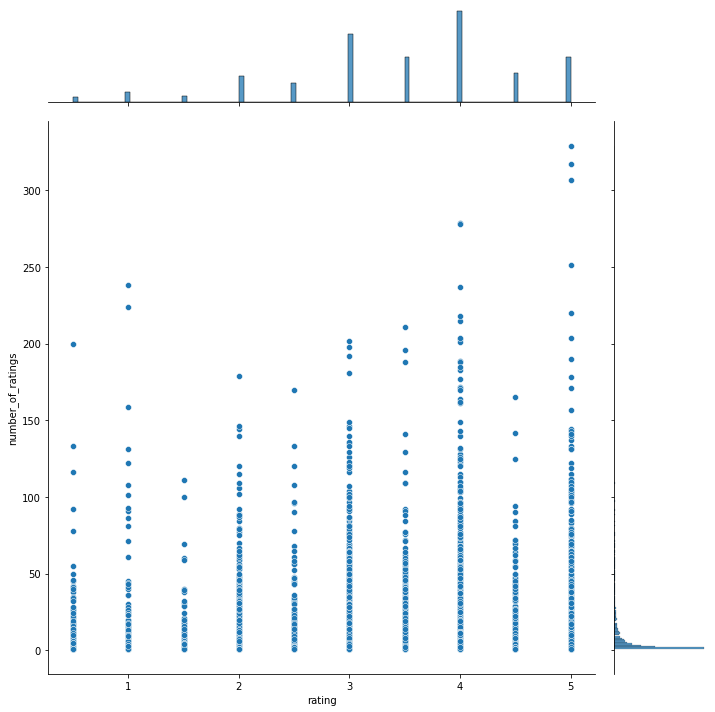

In [46]:
df = ratings.filter(['rating','movieId'], axis = 1)

df['number_of_ratings'] = df.groupby('movieId')['rating'].count()

import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=df, height = 10)

In [47]:
import altair as alt

In [ ]:
users_ratings = (
    ratings
    .groupby('userId', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='userId')
)

alt.hconcat(
    filtered_hist('rating count', '# ratings / user', occupation_filter),
    filtered_hist('rating mean', 'mean user rating', occupation_filter),
    occupation_chart,
    data=users_ratings)

In [14]:
data = ratings.merge(movies,on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [15]:
df = (ratings.groupby(by=['movieId'])['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount_movies'})
       [['movieId','totalRatingCount_movies']])
df.tail()

,movieId,totalRatingCount_movies
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1
9723,193609,1


In [16]:
df['totalRatingCount_movies'].describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: totalRatingCount_movies, dtype: float64

In [17]:
df1 = (ratings.groupby(by=['userId'])['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount_users'})
       [['userId','totalRatingCount_users']])
df1.tail()

,userId,totalRatingCount_users
605,606,1115
606,607,187
607,608,831
608,609,37
609,610,1302


In [18]:
df1['totalRatingCount_users'].describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: totalRatingCount_users, dtype: float64

In [19]:
data1 = data.merge(df,on='movieId')
data2 = data1.merge(df1,on='userId')
data2.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount_movies,totalRatingCount_users
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,232
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,52,232
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,102,232
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203,232
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,232


In [20]:
popular_movies1 = data2.query('totalRatingCount_movies >= 205')
popular_movies = popular_movies1.query ('totalRatingCount_users >= 50')
popular_movies.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount_movies,totalRatingCount_users
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,232
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War,237,232
15,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,232
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,232
20,1,356,4.0,964980962,Forrest Gump (1994),Comedy|Drama|Romance|War,329,232


In [22]:
#pivot ratings into movie features
movie_user_rating_pivot = popular_movies.pivot(
    index='movieId',
    columns='userId',
    values='rating'
).fillna(0)

# create mapper from movie title to index
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(movies.set_index('movieId').loc[movie_user_rating_pivot.index].title))
}

In [23]:
movie_user_rating_pivot

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
110,4.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.5,4.5,...,2.0,0.0,5.0,1.0,3.0,3.0,3.5,5.0,4.0,4.5
260,5.0,5.0,0.0,5.0,0.0,0.0,5.0,3.0,5.0,4.0,...,4.0,0.0,5.0,4.0,0.0,5.0,4.5,3.0,3.5,5.0
296,3.0,1.0,2.0,0.0,1.0,0.0,4.0,3.0,5.0,4.0,...,4.5,0.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,5.0
318,0.0,0.0,5.0,0.0,0.0,4.0,5.0,4.0,5.0,5.0,...,3.5,5.0,5.0,0.0,0.0,0.0,3.5,5.0,4.5,3.0
356,4.0,0.0,5.0,5.0,3.5,5.0,5.0,3.5,5.0,4.5,...,4.0,0.0,3.0,3.0,0.0,3.0,4.0,0.0,3.0,3.0
480,4.0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,4.5,3.5,...,3.0,0.0,4.0,0.0,0.0,3.0,2.5,4.0,3.0,5.0
527,5.0,0.0,3.0,0.0,0.0,0.0,5.0,4.0,4.5,4.5,...,3.0,5.0,5.0,3.0,0.0,0.0,5.0,5.0,4.0,3.5
589,0.0,0.0,3.0,2.5,0.0,4.0,5.0,0.0,4.5,4.5,...,3.0,0.0,5.0,0.0,0.0,3.5,3.5,4.0,3.0,5.0


In [24]:
from scipy.sparse import csr_matrix

# convert dataframe of movie features to scipy sparse matrix
movie_user_rating_matrix = csr_matrix(movie_user_rating_pivot.values)

In [25]:
# import libraries
from sklearn.neighbors import NearestNeighbors
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [27]:
pip install fuzzywuzzy

In [28]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_movie, verbose=True):
   
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [29]:
def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [31]:
my_favorite = 'Toy story'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_rating_matrix,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)

You have input movie: Toy story
Found possible matches in our database: ['Toy Story (1995)']

Recommendation system start to make inference
......

Recommendations for Toy story:
1: Braveheart (1995), with distance of 0.45022207098073763
2: Silence of the Lambs, The (1991), with distance of 0.44671689395127756
3: Matrix, The (1999), with distance of 0.4407993644556121
4: Terminator 2: Judgment Day (1991), with distance of 0.43316419998368727
5: Shawshank Redemption, The (1994), with distance of 0.4065399507605467
6: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.405116543174709
7: Pulp Fiction (1994), with distance of 0.4009367633968779
8: Star Wars: Episode IV - A New Hope (1977), with distance of 0.38376685257787513
9: Forrest Gump (1994), with distance of 0.3605730073931628
10: Jurassic Park (1993), with distance of 0.34129873687781387


In [32]:
pip install surprise

     |████████████████████████████████| 11.8 MB 4.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633758 sha256=fa1277d78f4d9b3493db60e69e5057634ec253d56f40f08597947db27c87b5dc
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [34]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate

reader = Reader()

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [35]:
from surprise.model_selection import train_test_split

In [36]:
trainset, testset = train_test_split(data, test_size=0.2)
trainsetfull = data.build_full_trainset()
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  610 

Number of items:  8946 



In [37]:
trainset_iids = list(trainset.all_items())
iid_converter = lambda x: trainset.to_raw_iid(x)
trainset_raw_iids = list(map(iid_converter, trainset_iids))

In [39]:
from surprise import KNNBasic
my_k = 15
my_min_k = 5
my_sim_option = {
    'name':'pearson', 'user_based':False, 
    }
algo = KNNBasic(
    k = my_k, min_k = my_min_k, sim_option = my_sim_option
    )
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [40]:
from surprise import accuracy
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9360


0.9359617506353204

In [41]:
from surprise.model_selection import cross_validate
results = cross_validate(
    algo = algo, data = data, measures=['RMSE'], 
    cv=5, return_train_measures=True
    )

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [42]:
results['test_rmse'].mean()

0.9380388734389111

In [43]:
algo.fit(trainsetfull)

Computing the msd similarity matrix...
Done computing similarity matrix.
